<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/ANN/ANN_DEMO_with_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
tf.keras.__version__

'2.8.0'

##### To see if <b>GPU</b> is available or not

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

1. Its dataset of handwritten digits
2. each data point is 2d array of 28x28 size
3. it has 10 classes 0-9
4. aka hello world of tf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
ROOT = "/content/drive/MyDrive/Ineuron_ANN_Keras_MNIST"
os.chdir(ROOT)

In [ ]:
os.listdir()

['ANN_DEMO.ipynb']

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
X_test.shape, y_test.shape, y_test.dtype

((10000, 28, 28), (10000,), dtype('uint8'))

In [5]:
X_valid , X_train_ = X_train[: 5000] / 255, X_train[5000:] / 255
y_valid, y_train_ = y_train[:5000], y_train[5000:] 

In [6]:

X_test = X_test/255

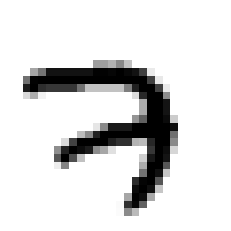

7

In [7]:
plt.imshow(X_train[5000], cmap="binary")
plt.axis("off")
plt.show()
y_train[5000]

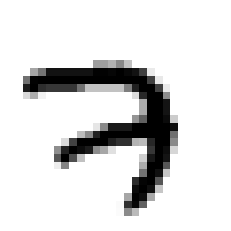

7

In [8]:
plt.imshow(X_train_[0], cmap="binary")
plt.axis("off")
plt.show()
y_train_[0]

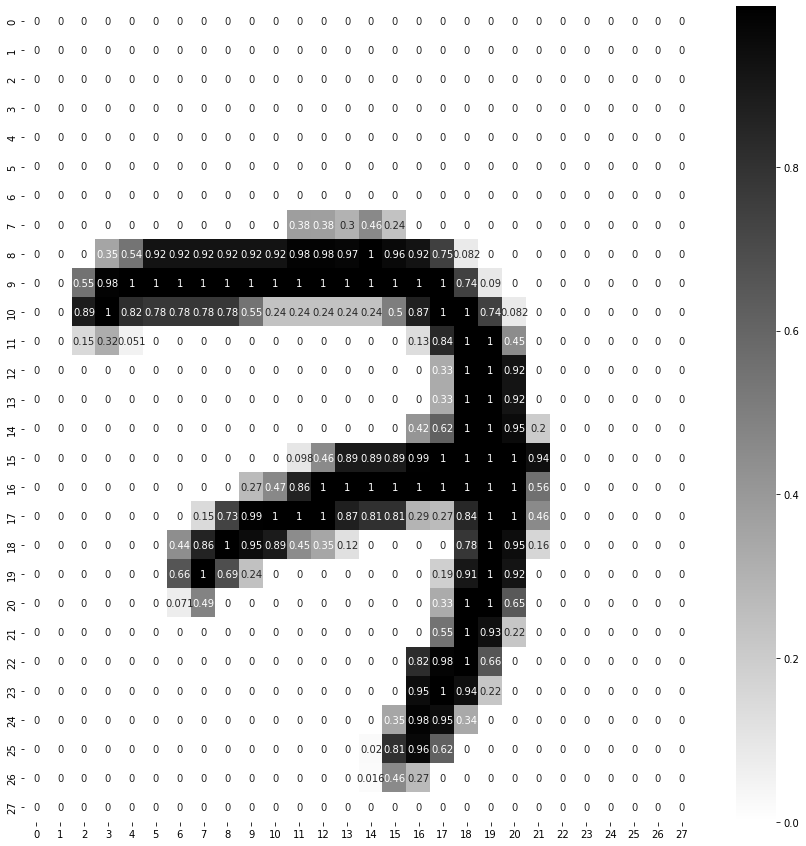

In [9]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(X_train_[0], annot=True, cmap="binary")

Sequential layer in keras means every layer is connected to next one, no layer is skipped

skipping layer is called skip correction


Defining list of layers

In [10]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="output")
]

In [11]:
model = tf.keras.models.Sequential(LAYERS)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


###### How Params are calculated

In [13]:
784*300 + 300

235500

In [14]:
300*100 + 100

30100

In [15]:
100*10 + 10

1010

##### It's shown that non trainable weights are 0. Its because we haven't frozen any weights. We freeze weights during transfer learning.

In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

###### Weights and biases

In [18]:
hidden1.get_weights()

[array([[ 0.06391332,  0.06303675,  0.04613013, ..., -0.05147759,
         -0.06212723, -0.06767094],
        [-0.03410138,  0.07168642,  0.0729963 , ...,  0.03346212,
          0.06453799, -0.00173973],
        [-0.02409636,  0.0683995 ,  0.06271666, ..., -0.05025203,
         -0.07300844,  0.06674011],
        ...,
        [-0.05388549, -0.02356726, -0.02206727, ..., -0.01888147,
         -0.00305568,  0.00048004],
        [ 0.01184791,  0.02673174,  0.04253747, ...,  0.02403953,
         -0.0047892 ,  0.07258141],
        [ 0.04654383,  0.04621539,  0.02885294, ...,  0.02368532,
         -0.03009897, -0.00092334]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights.shape, biases.shape

((784, 300), (300,))

*loss_function(actual, pred) = error*

In [21]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

we are using <b> Sparse categorical cross entropy</b> as loss function.
There is another loss function called categorical cross entropy.
We are using first one because we don't need to one hot encode our labels which are in the form 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

In <b>categorical cross entropy</b>, we need to one hot encode the labels as well.

In [22]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [23]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train_, y_train_,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6179 - accuracy: 0.8409 - val_loss: 0.3049 - val_accuracy: 0.9186
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2820 - accuracy: 0.9187 - val_loss: 0.2354 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2309 - accuracy: 0.9344 - val_loss: 0.2018 - val_accuracy: 0.9444
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1972 - accuracy: 0.9433 - val_loss: 0.1793 - val_accuracy: 0.9490
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1728 - accuracy: 0.9505 - val_loss: 0.1585 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1532 - accuracy: 0.9562 - val_loss: 0.1432 - val_accuracy: 0.9618
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1373 - accuracy: 0.9608 - val_loss: 0.1332 - val_accuracy:

In above output, 1719 is no. of batches.

no. of batch = total points / no. of points in one batch

total point in x_train = 55000<br>
batch size = 32


In [24]:
print("no. of batches = ", 55000/32)

no. of batches =  1718.75


In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9801


[0.06638985872268677, 0.9800999760627747]

# Saving model

In [ ]:
model.save("model.h5")

.h5 is extension to save keras model

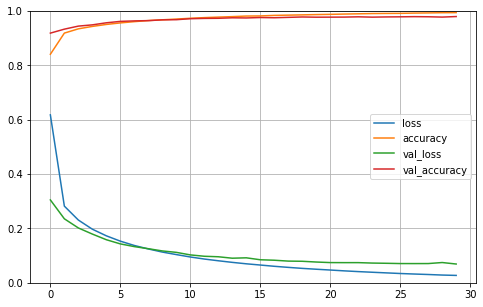

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

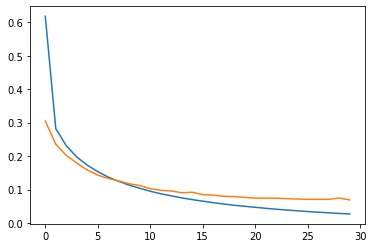

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [28]:
X_new = X_test[:3]
y_new = y_test[:3]
y_prob = model.predict(X_new)
y_prob

array([[4.00947692e-06, 4.75503441e-07, 7.05445200e-05, 8.76068196e-04,
        8.01610867e-09, 8.96002291e-07, 4.09706514e-12, 9.98953938e-01,
        1.13683391e-05, 8.26232208e-05],
       [1.15212956e-07, 1.06906136e-05, 9.99854684e-01, 1.21410754e-04,
        7.86639471e-13, 3.54017357e-06, 5.14721705e-07, 9.62857745e-12,
        8.93970537e-06, 2.00659433e-12],
       [1.95041557e-05, 9.97098327e-01, 5.99950727e-04, 1.41861863e-04,
        2.92962563e-04, 1.57021670e-04, 8.41012879e-05, 8.44867551e-04,
        7.30546366e-04, 3.08950803e-05]], dtype=float32)

In [29]:
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

argmax gives index of highest argument

In [30]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

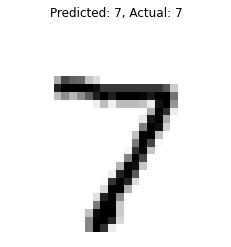

------------------------------------------------------------


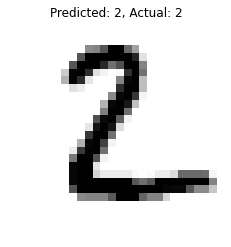

------------------------------------------------------------


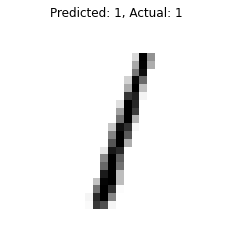

------------------------------------------------------------


In [31]:
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("---"*20)